### Problem 1

### Cash Matching
Two strategies of asset-liability portfolio managment are cash matching and portfolio immunization. 
When a company construct a portfolio to fund its future liabilities, there is a risk that on the due of the liabilities, the value of portfoli is not meeting the target value. 
In portfolio immunization, to immunize the portfolio the duration of the portfolio should be equal to the duration of liabilities. 
In cash matching strategy, the cash flow from principal and coupon should be exactly equal the liability amounts. 

In [249]:
! pip install cvxpy
import cvxpy as cp
import warnings
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import linprog
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


In [135]:
year_1 = [500]
year_2 = [200]
year_3 = [800]
year_4 = [200]
year_5 = [800]
year_6 = [1200]
index_data = ["Libilities"]
Liabilities= pd.DataFrame({"year 1": year_1, "year 2": year_2, "year 3": year_3,"year 4": year_4
                          ,"year 5": year_5,"year 6": year_6}, index=index_data)
Liabilities

,year 1,year 2,year 3,year 4,year 5,year 6
Libilities,500,200,800,200,800,1200


In [136]:
bond1 = [10.0,7.0,8.0,6.0,7.0,6.0,5.0,10.0,8.0,6.0,10.0,7.0,100.0]
bond2 = [10,7,8,6,7,6,5,10,8,6,110,107]
bond3 = [10,7,8,6,7,6,5,110,108,106]
bond4 = [10,7,8,6,7,106,105]
bond5 = [10,7,8,106,107]
bond6 = [110,107,108]
price = [109,94.8,99.5,93.1,97.2,96.30,92.90,110,104,101,107,102,95.2]
max_len = max(len(bond1), len(bond2), len(bond3), len(bond4), len(bond5), len(bond6), len(price))

bond = pd.DataFrame({
    "bond 1": bond1 + [0] * (max_len - len(bond1)),
    "bond 2": bond2 + [0] * (max_len - len(bond2)),
    "bond 3": bond3 + [0] * (max_len - len(bond3)),
    "bond 4": bond4 + [0] * (max_len - len(bond4)),
    "bond 5": bond5 + [0] * (max_len - len(bond5)),
    "bond 6": bond6 + [0] * (max_len - len(bond6)),
    "price": price
})

bond

,bond 1,bond 2,bond 3,bond 4,bond 5,bond 6,price
0,10.0,10,10,10,10,110,109.0
1,7.0,7,7,7,7,107,94.8
2,8.0,8,8,8,8,108,99.5
3,6.0,6,6,6,106,0,93.1
4,7.0,7,7,7,107,0,97.2
5,6.0,6,6,106,0,0,96.3
6,5.0,5,5,105,0,0,92.9
7,10.0,10,110,0,0,0,110.0
8,8.0,8,108,0,0,0,104.0
9,6.0,6,106,0,0,0,101.0


In [137]:
year_1 = [0.0504]
year_2 = [0.0594]
year_3 = [0.0636]
year_4 = [0.0718]
year_5 = [0.0789]
year_6 = [0.0839]
index_data = ["spot rate"]
sopt_rate= pd.DataFrame({"year 1": year_1, "year 2": year_2, "year 3": year_3,"year 4": year_4
                          ,"year 5": year_5,"year 6": year_6}, index=index_data)
sopt_rate

,year 1,year 2,year 3,year 4,year 5,year 6
spot rate,0.0504,0.0594,0.0636,0.0718,0.0789,0.0839


###  Solve the linear programing with scipy
- #### Without investment
- min 109x1+94.80x2+99.5x3+93.1x4+97.2x5+96.3x6+92.9x7+110x8+104x9+101x10+107x11+102x12+95.2x13
- st: 
-    10x1+7x2+8x3+6x4+7x5+6x6+5x7+10x8+8x9+6x10+10x11+7x12+100x13 >= 500 
-    10x1+7x2+8x3+6x4+7x5+6x6+5x7+10x8+8x9+6x10+110x11+107x12 > = 200
-    10x1+7x2+8x3+6x4+7x5+6x6+5x7+110x8+108x9+106x10 >= 800
-    10x1+7x2+8x3+6x4+7x5+106x6+105x7 > = 200
-    10x1+7x2+8x3+106x4+107x5 >= 800
-    110x1+107x2+108x3 > = 1200


In [138]:
c = []
for i in bond.index:
    bond_price = bond["price"][i]
    c.append(bond_price)
c = np.array(c)
c

array([109. ,  94.8,  99.5,  93.1,  97.2,  96.3,  92.9, 110. , 104. ,
       101. , 107. , 102. ,  95.2])

In [139]:
m,n = bond.shape
A = []
for j in range(n-1):
    A.append(bond.iloc[:,j].tolist())

A = np.array(A)
A = A*-1

In [140]:
b = [-500,-200,-800,-200,-800,-1200]

In [141]:
cost = linprog(c, A_ub=A, b_ub=b)
cost.fun

2754.2844571158125

In [142]:
cost.x

array([ 0.        ,  0.        , 11.11111111,  0.        ,  6.64589823,
        0.60933796,  0.        ,  0.        ,  6.11975737,  0.        ,
        0.10887033,  0.        ,  3.10887033])

- #### with investment at zero rate
- min 109x1+94.80x2+99.5x3+93.1x4+97.2x5+96.3x6+92.9x7+110x8+104x9+101x10+107x11+102x12+95.2x13+0x14+0x15+0x16+0x17+0x18
- st: 
-    10x1+7x2+8x3+6x4+7x5+6x6+5x7+10x8+8x9+6x10+10x11+7x12+100x13-x14 >= 500 
-    10x1+7x2+8x3+6x4+7x5+6x6+5x7+10x8+8x9+6x10+110x11+107x12+x14-x15 > = 200
-    10x1+7x2+8x3+6x4+7x5+6x6+5x7+110x8+108x9+106x10+x15 -x16 >= 800
-    10x1+7x2+8x3+6x4+7x5+106x6+105x7+x16 -x17 > = 200
-    10x1+7x2+8x3+106x4+107x5+x17 -x18>= 800
-    110x1+107x2+108x3+x18 > = 1200

In [143]:
c_1 = np.concatenate([c, np.zeros(5)])
c_1

array([109. ,  94.8,  99.5,  93.1,  97.2,  96.3,  92.9, 110. , 104. ,
       101. , 107. , 102. ,  95.2,   0. ,   0. ,   0. ,   0. ,   0. ])

In [144]:
investment_mat = [[1,0,0,0,0],[-1,1,0,0,0],[0,-1,1,0,0]
                  ,[0,0,-1,1,0],[0,0,0,-1,1],[0,0,0,0,-1]]
A_1 = np.concatenate((A, investment_mat),axis =1)
A_1

array([[ -10.,   -7.,   -8.,   -6.,   -7.,   -6.,   -5.,  -10.,   -8.,
          -6.,  -10.,   -7., -100.,    1.,    0.,    0.,    0.,    0.],
       [ -10.,   -7.,   -8.,   -6.,   -7.,   -6.,   -5.,  -10.,   -8.,
          -6., -110., -107.,   -0.,   -1.,    1.,    0.,    0.,    0.],
       [ -10.,   -7.,   -8.,   -6.,   -7.,   -6.,   -5., -110., -108.,
        -106.,   -0.,   -0.,   -0.,    0.,   -1.,    1.,    0.,    0.],
       [ -10.,   -7.,   -8.,   -6.,   -7., -106., -105.,   -0.,   -0.,
          -0.,   -0.,   -0.,   -0.,    0.,    0.,   -1.,    1.,    0.],
       [ -10.,   -7.,   -8., -106., -107.,   -0.,   -0.,   -0.,   -0.,
          -0.,   -0.,   -0.,   -0.,    0.,    0.,    0.,   -1.,    1.],
       [-110., -107., -108.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
          -0.,   -0.,   -0.,   -0.,    0.,    0.,    0.,    0.,   -1.]])

In [145]:
cost_1 = linprog(c_1, A_ub=A_1, b_ub=b)
cost_1.fun

2754.2844571158166

In [146]:
cost_1.x

array([ 0.        ,  0.        , 11.11111111,  0.        ,  6.64589823,
        0.60933796,  0.        ,  0.        ,  6.11975737,  0.        ,
        0.10887033,  0.        ,  3.10887033,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

- #### with investment at forward rate
- first we need to calculate the 

In [147]:
spotRate = sopt_rate.iloc[0].values

In [148]:
forward_rate = []
for i in range(len(spotRate)-1):
    forwardRate  = ((1+spotRate[i+1])**(i+2))/((1+spotRate[i])**(i+1)) - 1
    forward_rate.append(forwardRate)

In [149]:
inves_mat = [[1,0,0,0,0],[-(1+forward_rate[0]),1,0,0,0],[0,-(1+forward_rate[1]),1,0,0]
                  ,[0,0,-(1+forward_rate[2]),1,0],[0,0,0,-(1+forward_rate[3]),1],[0,0,0,0,-(1+forward_rate[4])]]
A_2 = np.concatenate((A, inves_mat),axis =1)

In [150]:
lb = np.zeros(18)
ub = np.ones(18) * np.inf
cost_2 = linprog(c_1, A_ub=A_2, b_ub=b, bounds=list(zip(lb, ub)))
cost_2.fun

2745.575510896118

In [151]:
cost_2.x

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   23.28247344,    0.        ,
          2.67175266,    0.        , 2361.07207836, 1731.18736603,
       1698.733876  , 1081.81229708])

#### Optimal Immunization
for optimal immunization, constraints are :
- present value of bonds >= present values of liabilities
- dollar duration of bonds >= dollar duration of liabilities (Dollar duration is one of several different measurements of bond's duration)

In [152]:
# present value of liabilities
liabilities = Liabilities.iloc[0].values
pv_liabilities = []
for i in range (len(spotRate)):
    pv =liabilities[i]/((1+spotRate[i])**(i+1))
    pv_liabilities.append(pv)
    
presentValueLiabilities = sum(pv_liabilities)
presentValueLiabilities

2757.9367548911464

In [153]:
bond

,bond 1,bond 2,bond 3,bond 4,bond 5,bond 6,price
0,10.0,10,10,10,10,110,109.0
1,7.0,7,7,7,7,107,94.8
2,8.0,8,8,8,8,108,99.5
3,6.0,6,6,6,106,0,93.1
4,7.0,7,7,7,107,0,97.2
5,6.0,6,6,106,0,0,96.3
6,5.0,5,5,105,0,0,92.9
7,10.0,10,110,0,0,0,110.0
8,8.0,8,108,0,0,0,104.0
9,6.0,6,106,0,0,0,101.0


In [155]:
# dollar duration of bonds
Bond_DD = []

for j in range(13):
    dd = []
    for i in range(6):
        d = (i + 1) * bond.iloc[j, i] / (1 + spotRate[i])**(i + 2)
        dd.append(d)
    
    bond_sum = sum(dd)
    Bond_DD.append(bond_sum)

Bond_DD

[484.81772630028456,
 441.7837348255197,
 456.12839865044134,
 382.60293221465054,
 393.53388515906147,
 329.37238347580234,
 321.61160267687325,
 283.75420557859707,
 273.8887979543835,
 264.0233903301699,
 194.0936548208736,
 186.3283584082791,
 90.63388030759255]

In [156]:
# dollar duration of liabilities
liabilities
l = []
for i in range(6):
    l_D = (i + 1) * liabilities[i] / (1 + spotRate[i])**(i + 2)
    l.append(l_D)
liabilities_dollarDuration = sum(l)

In [157]:
liabilities_dollarDuration

9863.211578452068

in this case the constraints are : 
- 484.81772630028456x1+441.7837348255197x2+456.12839865044134x3 +382.60293221465054x4 +393.53388515906147x5 +
      329.37238347580234x6 + 321.61160267687325x7+ 283.75420557859707x8+ 273.8887979543835x9+ 264.0233903301699x10+
      194.0936548208736x11 + 186.3283584082791x12 + 90.63388030759255x13 > = 9863.211578452068
      
- 109x1+94.8x2+99.5x3+93.1x4+97.2x5+96.3x6+92.9x7+110x8+104x9+101x10+107x11+102x12+95.2x13 >= 2757.9367548911464


so A and b are :


In [158]:
negative_Bond_DD = np.array(Bond_DD) * -1
negative_price = np.array(bond["price"]) * -1
A_3 = np.row_stack((negative_Bond_DD, negative_price))
A_3

array([[-484.8177263 , -441.78373483, -456.12839865, -382.60293221,
        -393.53388516, -329.37238348, -321.61160268, -283.75420558,
        -273.88879795, -264.02339033, -194.09365482, -186.32835841,
         -90.63388031],
       [-109.        ,  -94.8       ,  -99.5       ,  -93.1       ,
         -97.2       ,  -96.3       ,  -92.9       , -110.        ,
        -104.        , -101.        , -107.        , -102.        ,
         -95.2       ]])

In [159]:
b_3 = [-liabilities_dollarDuration,-presentValueLiabilities]
b_3

[-9863.211578452068, -2757.9367548911464]

In [160]:
lb = np.zeros(13)
ub = np.ones(13) * np.inf
cost_3 = linprog(c, A_ub=A_3, b_ub=b_3, bounds=list(zip(lb, ub)))
cost_3.fun

2757.936754891146

In [161]:
cost_3.x

array([ 0.        ,  2.77722855,  0.        ,  0.        ,  0.        ,
        0.        , 26.85312689,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

### Problem2
SPDR S&P 500 ETF (SPY), iShares Core US Treasury Bond (GOVT),iShares MSCI Emerging Markets Mini Vol (EEMV),

In [253]:
def stock (share):
    data = yf.download (share,start = "2013-12-01", end = "2022-12-31")
    monthly_data = data.resample("M").last()
# calculate the percentage change between the adjusted close rate of the last day of the current month
# and the last day of the previous month
    monthly_data['shift_adj'] = monthly_data['Adj Close'].shift(1)
    monthly_data[share] = ((monthly_data['Adj Close'] / monthly_data['shift_adj'] ) - 1)
    monthly_data = monthly_data.dropna()
    monthlyData = monthly_data[share]
    return monthlyData

In [254]:
spy_monthly = stock ("SPY")
govt_monthly = stock("GOVT")
eemva_monthly = stock("EEMV")
returns = pd.concat([spy_monthly, govt_monthly, eemva_monthly], axis=1)
returns.head(3)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,GOVT,EEMV
Date,,,
2014-01-31,-0.035248,0.012346,-0.081359
2014-02-28,0.045516,0.002970,0.035874
2014-03-31,0.008296,-0.004019,0.031746


In [164]:
stock = (pd.DataFrame({
    'Mean': [float(returns[['SPY']].mean()), float(returns[['GOVT']].mean()), float(returns[['EEMV']].mean())],
    'Std': [float(returns[['SPY']].std()), float(returns[['GOVT']].std()), float(returns[['EEMV']].std())],
    'Geometric_Expected_Return': [(((np.prod(returns['SPY'] + 1))**(1/len(returns['SPY']))) - 1) ,
        (((np.prod(returns['GOVT'] + 1))**(1/len(returns['GOVT']))) - 1) ,
        (((np.prod(returns['EEMV'] + 1))**(1/len(returns['EEMV']))) - 1) ]}, index=["SPY", "GOVT", "EEMV"]))
stock

,Mean,Std,Geometric_Expected_Return
SPY,0.009270,0.043954,0.008308
GOVT,0.000743,0.012738,0.000663
EEMV,0.001845,0.037070,0.001160


In [171]:
# Calculate the covariance matrix of the three assets
Q = np.cov(returns, rowvar=False)
Q

array([[ 1.93197651e-03, -5.49176935e-06,  1.11715105e-03],
       [-5.49176935e-06,  1.62256563e-04,  3.00626913e-05],
       [ 1.11715105e-03,  3.00626913e-05,  1.37420676e-03]])

In [166]:
returns.max(), returns.min()

(SPY     0.126984
 GOVT    0.033504
 EEMV    0.093445
 dtype: float64,
 SPY    -0.124871
 GOVT   -0.034120
 EEMV   -0.120690
 dtype: float64)

In [174]:
mu = np.array(stock ["Geometric_Expected_Return"].values)
mu

array([0.00830801, 0.00066303, 0.00116008])

##### solve the optimization by Python library cvxpy

The Problem class is the entry point to specifying and solving optimization problems. Each Problem instance encapsulates an optimization problem, i.e., an objective and a set of constraints. The solve() method either solves the problem encoded by the instance, returning the optimal value and setting variables values to optimal points, or reports that the problem was in fact infeasible or unbounded. (https://www.cvxpy.org/api_reference/cvxpy.problems.html)

\begin{equation}
\begin{array}{rl}
\displaystyle \min_{w} & w^TQw \\
{\rm s.t.} & \mu^Tw \geq \varepsilon \\
&\sum_i w_i = 1\\
& w \geq 0
\end{array}
\end{equation}
\begin{equation}
\varepsilon \in [\varepsilon_{R_{\rm minVar}},\varepsilon_{R_{\rm maxRet}}]
\end{equation}

In [219]:
targetRet = np.linspace(0.0001,0.008,50)
targetRet

array([0.0001    , 0.00026122, 0.00042245, 0.00058367, 0.0007449 ,
       0.00090612, 0.00106735, 0.00122857, 0.0013898 , 0.00155102,
       0.00171224, 0.00187347, 0.00203469, 0.00219592, 0.00235714,
       0.00251837, 0.00267959, 0.00284082, 0.00300204, 0.00316327,
       0.00332449, 0.00348571, 0.00364694, 0.00380816, 0.00396939,
       0.00413061, 0.00429184, 0.00445306, 0.00461429, 0.00477551,
       0.00493673, 0.00509796, 0.00525918, 0.00542041, 0.00558163,
       0.00574286, 0.00590408, 0.00606531, 0.00622653, 0.00638776,
       0.00654898, 0.0067102 , 0.00687143, 0.00703265, 0.00719388,
       0.0073551 , 0.00751633, 0.00767755, 0.00783878, 0.008     ])

In [236]:
w = cp.Variable(3)
weight = []
returns = []
for eps in targetRet: 
    prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)),
                 [mu.T@w >= eps,
                  sum(w) == 1,
                  w >= 0])
    prob3.solve(verbose=False)
    weight.append(w.value)    

In [245]:
portfolio_retuen = []
portfolio_variance = []
for i in range(len(weight)):
    returns = np.dot(mu,weight[i])
    portfolio_retuen.append(returns)
    variance = np.dot(weight[i],np.dot(Q,weight[i]))
    portfolio_variance.append(variance)

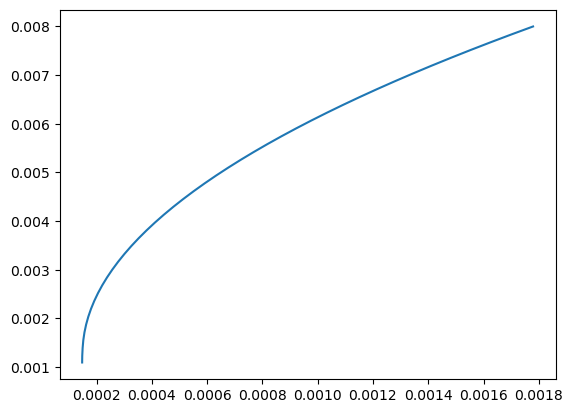

In [251]:
plt.plot(portfolio_variance, portfolio_retuen, label='Line 1')
plt.show()

In [257]:
cme_monthly = stock ("CME")
br_monthly = stock("BR")
cboe_monthly = stock("CBOE")
ice_monthly = stock("ICE")
acn_monthly = stock("ACN")
return_8 = pd.concat([returns, cme_monthly, br_monthly,cboe_monthly,ice_monthly,acn_monthly], axis=1)
return_8.head(3)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,GOVT,EEMV,CME,BR,CBOE,ICE,ACN
Date,,,,,,,,
2014-01-31,-0.035248,0.012346,-0.081359,-0.047157,-0.081730,0.001155,-0.071715,-0.028460
2014-02-28,0.045516,0.002970,0.035874,-0.012574,0.040507,0.042122,0.000240,0.043440
2014-03-31,0.008296,-0.004019,0.031746,0.008914,-0.010994,0.047566,-0.049766,-0.043551


In [259]:
stocks = (pd.DataFrame({
    'Mean': [float(return_8[['SPY']].mean()), float(return_8[['GOVT']].mean()), float(return_8[['EEMV']].mean()),
            float(return_8[['CME']].mean()), float(return_8[['BR']].mean()), float(return_8[['CBOE']].mean()),
            float(return_8[['ICE']].mean()), float(return_8[['ACN']].mean())],
    'Std': [float(return_8[['SPY']].std()), float(return_8[['GOVT']].std()), float(return_8[['EEMV']].std()),
           float(return_8[['CME']].std()), float(return_8[['BR']].std()), float(return_8[['CBOE']].std()),
            float(return_8[['ICE']].std()), float(return_8[['ACN']].std())],
    'Geometric_Expected_Return': [(((np.prod(return_8['SPY'] + 1))**(1/len(return_8['SPY']))) - 1) ,
        (((np.prod(return_8['GOVT'] + 1))**(1/len(return_8['GOVT']))) - 1) ,
        (((np.prod(return_8['EEMV'] + 1))**(1/len(return_8['EEMV']))) - 1),
        (((np.prod(return_8['CME'] + 1))**(1/len(return_8['CME']))) - 1) ,                         
        (((np.prod(return_8['BR'] + 1))**(1/len(return_8['BR']))) - 1) ,                         
        (((np.prod(return_8['CBOE'] + 1))**(1/len(return_8['CBOE']))) - 1) ,                         
        (((np.prod(return_8['ICE'] + 1))**(1/len(return_8['ICE']))) - 1) ,                         
        (((np.prod(return_8['ACN'] + 1))**(1/len(return_8['ACN']))) - 1) 
                                 ]}, index=["SPY", "GOVT", "EEMV","CME","BR","CBOE","ICE","ACN"]))
stocks

,Mean,Std,Geometric_Expected_Return
SPY,0.009270,0.043954,0.008308
GOVT,0.000743,0.012738,0.000663
EEMV,0.001845,0.037070,0.001160
CME,0.011867,0.054620,0.010408
BR,0.014846,0.062337,0.012937
CBOE,0.010789,0.062717,0.008803
ICE,0.010454,0.059593,0.008722
ACN,0.014452,0.063561,0.012449


In [260]:
# Calculate the covariance matrix 
Q8 = np.cov(return_8, rowvar=False)
Q8

array([[ 1.93197800e-03, -5.49200065e-06,  1.11715184e-03,
         8.82226608e-04,  1.79533731e-03,  1.01503805e-03,
         1.65569936e-03,  2.33232843e-03],
       [-5.49200065e-06,  1.62257344e-04,  3.00638737e-05,
        -3.74186598e-05,  1.09620357e-04,  3.17663763e-05,
         4.54740596e-05,  6.39848848e-05],
       [ 1.11715184e-03,  3.00638737e-05,  1.37420721e-03,
         3.04156746e-04,  9.59232013e-04,  3.43437826e-04,
         6.49912864e-04,  1.07370960e-03],
       [ 8.82226608e-04, -3.74186598e-05,  3.04156746e-04,
         2.98329129e-03,  1.18355639e-03,  1.74100404e-03,
         1.96846295e-03,  1.16791309e-03],
       [ 1.79533731e-03,  1.09620357e-04,  9.59232013e-04,
         1.18355639e-03,  3.88587416e-03,  1.07993093e-03,
         1.74641119e-03,  2.70115966e-03],
       [ 1.01503805e-03,  3.17663763e-05,  3.43437826e-04,
         1.74100404e-03,  1.07993093e-03,  3.93339737e-03,
         1.66391760e-03,  1.37726863e-03],
       [ 1.65569936e-03,  4.547405

In [261]:
return_8.max(), return_8.min()

(SPY     0.126983
 GOVT    0.033504
 EEMV    0.093445
 CME     0.161292
 BR      0.223242
 CBOE    0.176011
 ICE     0.205888
 ACN     0.159905
 dtype: float64,
 SPY    -0.124871
 GOVT   -0.034120
 EEMV   -0.120690
 CME    -0.126887
 BR     -0.153218
 CBOE   -0.217105
 ICE    -0.123448
 ACN    -0.144864
 dtype: float64)

In [262]:
mu = np.array(stocks ["Geometric_Expected_Return"].values)
mu

array([0.00830801, 0.00066303, 0.00116008, 0.0104083 , 0.01293682,
       0.00880259, 0.00872234, 0.01244869])

In [263]:
w = cp.Variable(8)
weight = []
returns = []
for eps in targetRet: 
    prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q8)),
                 [mu.T@w >= eps,
                  sum(w) == 1,
                  w >= 0])
    prob3.solve(verbose=False)
    weight.append(w.value) 

In [264]:
portfolio_retuen = []
portfolio_variance = []
for i in range(len(weight)):
    returns = np.dot(mu,weight[i])
    portfolio_retuen.append(returns)
    variance = np.dot(weight[i],np.dot(Q8,weight[i]))
    portfolio_variance.append(variance)

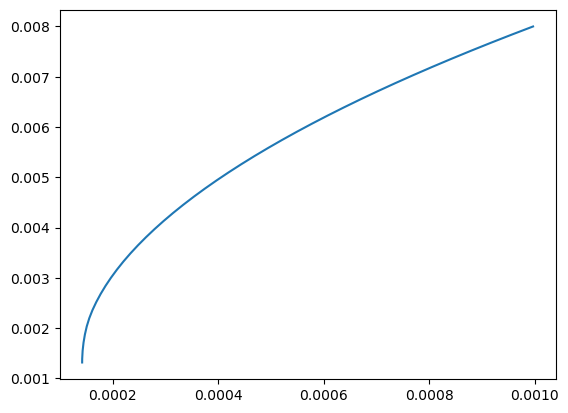

In [265]:
plt.plot(portfolio_variance, portfolio_retuen, label='Line 1')
plt.show()